In [1]:
import tensorflow as tf 
import cv2 as cv 
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 

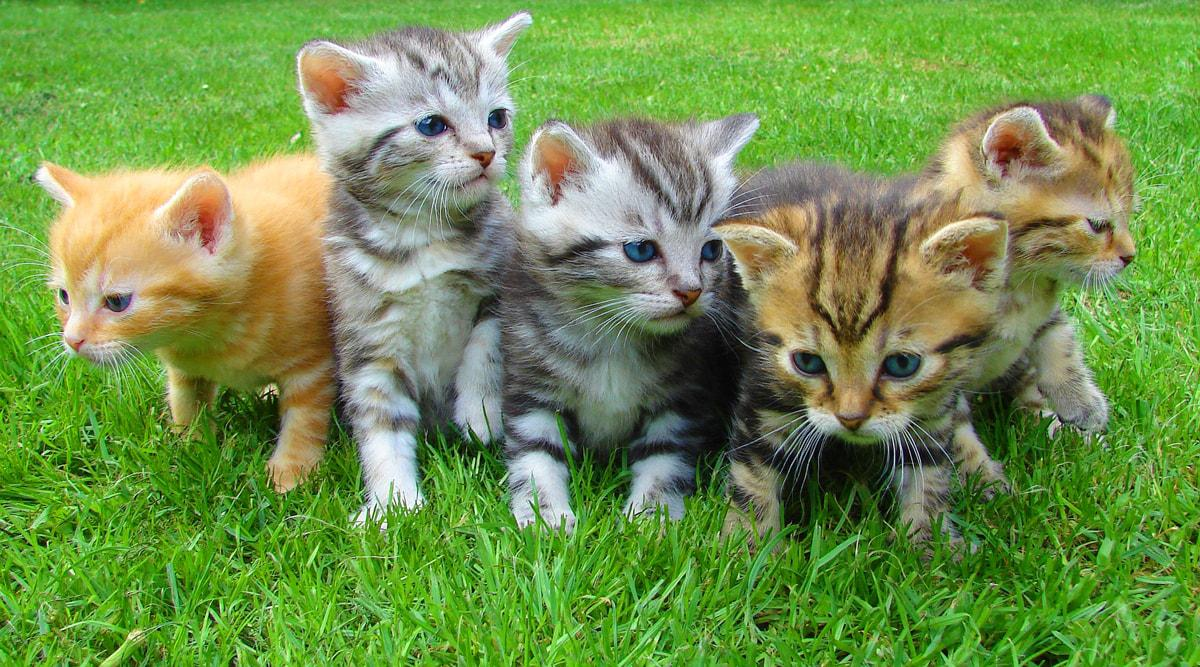

In [2]:
image_file_path = r"C:\Users\Ranjit\Desktop\JECRC-20april2024\CNN\Data\images\cats\cat_60.jpg"
img = Image.open(image_file_path)
img

In [3]:
img_dire_path = r"C:\Users\Ranjit\Desktop\jecrc-10-may2024\CNN\Data\images"

In [4]:
import os 

In [5]:
os.listdir(img_dire_path)  #list down all the files and folder are present at the location 

['cats', 'dogs']

In [6]:
img_dire_path+'\\'+"cats"

'C:\\Users\\Ranjit\\Desktop\\jecrc-10-may2024\\CNN\\Data\\images\\cats'

In [7]:
cat_dir_path = os.path.join(img_dire_path,"cats")
dog_dir_path = os.path.join(img_dire_path,"dogs")
print("cats directory path : ",cat_dir_path)
print("dog directory path : ",dog_dir_path )

cats directory path :  C:\Users\Ranjit\Desktop\jecrc-10-may2024\CNN\Data\images\cats
dog directory path :  C:\Users\Ranjit\Desktop\jecrc-10-may2024\CNN\Data\images\dogs


In [8]:
print("Total no. of cat images in my folder : ",len(os.listdir(cat_dir_path)))
print("Total no. of dog images in my folder : ",len(os.listdir(dog_dir_path)))


Total no. of cat images in my folder :  349
Total no. of dog images in my folder :  348


In [9]:
path_dict = {"cats":[],"dogs":[]}

for filename in os.listdir(cat_dir_path):
    # print(filename)
    path_dict['cats'].append(os.path.join(cat_dir_path,filename))


for filename in os.listdir(dog_dir_path):
    # print(filename)
    path_dict['dogs'].append(os.path.join(dog_dir_path,filename))

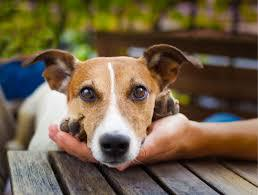

In [10]:

img = Image.open(path_dict['dogs'][40])
img

In [11]:
# np.array(img)

In [12]:
# cv.imread(path_dict['dogs'][75])

In [13]:
image_arr = []
labels = []
for key , value in path_dict.items(): 
    for path in value:
        img_arr = cv.imread(path)
        resized_img = cv.resize(img_arr,(244,244))
        image_arr.append(resized_img)
        labels.append(key)
    

In [14]:
len(image_arr)

697

In [15]:
len(labels)


697

In [16]:
set(labels)

{'cats', 'dogs'}

In [17]:
# labels  # cat 1 , dog = 0 
images = np.array(image_arr)    ## X 
labels = np.array([1 if item == "cats" else 0 for item in labels])   # Y

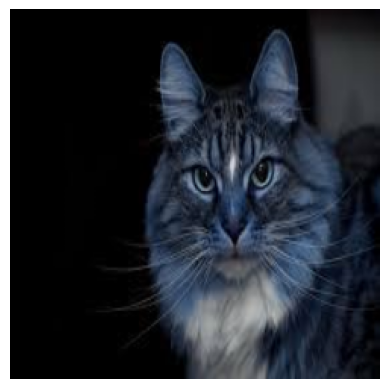

In [18]:
plt.imshow(images[8]) # 0- 255
plt.axis("off")
plt.show()

In [29]:
# 0-255  ===>   0- 1

In [20]:
scaled_image = images/255.0

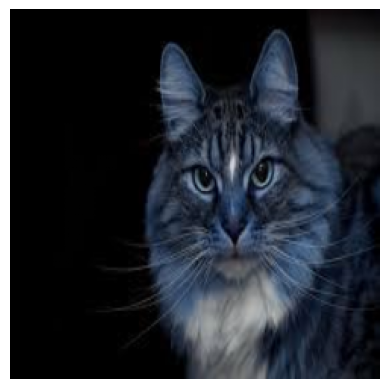

In [21]:
plt.imshow(scaled_image[8]) # 0- 255
plt.axis("off")
plt.show()

In [ ]:
!pip install scikit-learn 

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
x_train,x_test,y_train,y_test = train_test_split(scaled_image,labels,test_size=0.15)

In [ ]:
##### CNN model 

In [24]:
len(x_train)

592

In [26]:
x_train[2].ndim

3

In [30]:
x_train[2].shape 

(244, 244, 3)

In [27]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 

In [34]:
# Define the CNN architecture
model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(244, 244, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(30, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(48, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
model.summary()

C:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 242, 242, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 121, 121, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 119, 119, 30)        │          17,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 424830)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 48)                  │      20,391,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,411,039 (77.86 MB)

 Trainable params: 20,411,039 (77.86 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(x_train,y_train,epochs=7,batch_size=16, validation_data=(x_test,y_test))

Epoch 1/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4937 - loss: 2.4410 - val_accuracy: 0.5238 - val_loss: 0.6928
Epoch 2/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6634 - loss: 0.6958 - val_accuracy: 0.5905 - val_loss: 0.6872
Epoch 3/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7067 - loss: 0.6426 - val_accuracy: 0.6095 - val_loss: 0.6533
Epoch 4/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8449 - loss: 0.3761 - val_accuracy: 0.4952 - val_loss: 0.8975
Epoch 5/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9441 - loss: 0.1516 - val_accuracy: 0.5238 - val_loss: 1.1257
Epoch 6/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9793 - loss: 0.0765 - val_accuracy: 0.5619 - val_loss: 1.1272
Epoch 7/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9975 - loss: 0.0219 - val_accuracy: 0.5619 - val_loss: 1.3727


In [36]:
prediction = model.predict(x_test) 


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step


In [40]:
prediction.shape 

(105, 1)

In [45]:
predictions = (prediction>0.5).astype(int).ravel()

In [46]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [47]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
# confusion_matrix(actual , predicted ) 
confusion_matrix(y_test,predictions)

array([[28, 22],
       [24, 31]], dtype=int64)

In [51]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.54      0.56      0.55        50
           1       0.58      0.56      0.57        55

    accuracy                           0.56       105
   macro avg       0.56      0.56      0.56       105
weighted avg       0.56      0.56      0.56       105

